# Beispiel Neumann Randbedingung für Diffusionsgleichung


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Anfangsbedingung

In [2]:
def phi(x):
    inda = x<np.pi/2
    indb = x>=np.pi/2
    return np.array(x[inda].tolist()+(np.pi-x[indb]).tolist())

Im Beispiel wählen wir
$$g(t) = h(t) = 0.$$

Zerlegung des Intervalls $[0,\pi]$

In [3]:
J = 20
x = np.linspace(0,np.pi,J+1)

FTCS-Scheme

In [4]:
# selber implementieren
from functions import explizitFTCSSchemaNeumann

In [5]:
u0 = phi(x)

Lösung

In [6]:
s = 5/11
dt = s*(np.pi/J)**2
usol = explizitFTCSSchemaNeumann(u0, 41, s)
print(s, dt)

0.45454545454545453 0.01121545954669245


In [7]:
t = dt*np.arange(usol.shape[0])

In [8]:
ti,xi = np.meshgrid(t,x)

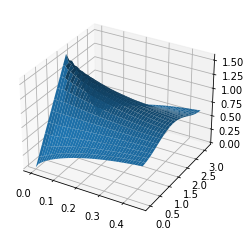

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(ti,xi,usol.T)

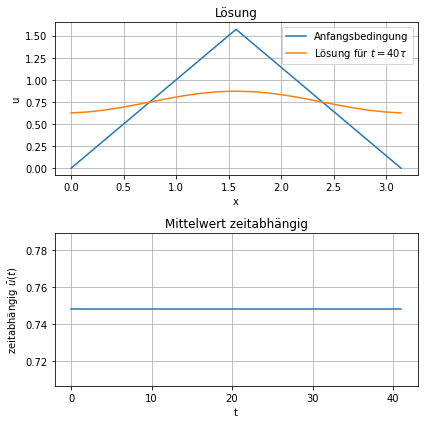

In [10]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(x,usol[0,:], label='Anfangsbedingung')
plt.plot(x,usol[-1,:], label=r'Lösung für $t = 40\tau$')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Lösung')
plt.subplot(2,1,2)
plt.plot(np.mean(usol,axis=1))
plt.title('Mittelwert zeitabhängig')
plt.ylabel(r'zeitabhängig $\bar{u}(t)$')
plt.xlabel('t')
plt.grid()
plt.tight_layout()
#plt.savefig('BeispielFTCSSchemeNeumann.pdf')
plt.show()